#### A Mini Project on learning which form of Gradient Descent(Stochastic, Batch, Mini Batch) works more efficiently.

By:
Jharana Adhikari and Yasaswin Palukuri

# Stochastic Gradient Descent VS Batch Gradient Descent
### Steps we are going to follow.
1. Importing the file and Libraries needed
2. Having a look at data and understanding the shape
3. Encoding data using LabelEncoder
4. Feature identification
5. Train-Test-Split using scikit learn
6. Using Linear Regression as a base model
7. Check the Mean Sqaure Error for Batch Gradient Descent
8. Check the Mean Sqaure Error for Stochastic Gradient Descent
9. Comparing the results
10. Creating a Neural Network
11. Check the Mean Sqaure Error for Batch Gradient Descent
12. Check the Mean Sqaure Error for Stochastic Gradient Descent
13. Comparing and Contrasting which one is more computationally efficient

In [1]:
# import labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# load dataset
csv_path = 'uber_reviews_without_reviewid.csv'
df = pd.read_csv(csv_path)

In [4]:
df.shape

(12000, 10)

In [5]:
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,User_0,NaN,Good,5,0,4.556.10005,2024-12-18 17:17:19,NaN,NaN,4.556.10005
1,User_1,NaN,Nice,5,0,4.556.10005,2024-12-18 17:17:17,NaN,NaN,4.556.10005
2,User_2,NaN,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,NaN,NaN,4.532.10001
3,User_3,NaN,Good,4,0,4.556.10005,2024-12-18 17:08:27,NaN,NaN,4.556.10005
4,User_4,NaN,exllence,5,0,4.556.10005,2024-12-18 17:08:16,NaN,NaN,4.556.10005


In [6]:
df.columns

Index(['userName', 'userImage', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt',
       'appVersion'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              12000 non-null  object 
 1   userImage             0 non-null      float64
 2   content               12000 non-null  object 
 3   score                 12000 non-null  int64  
 4   thumbsUpCount         12000 non-null  int64  
 5   reviewCreatedVersion  10260 non-null  object 
 6   at                    12000 non-null  object 
 7   replyContent          33 non-null     object 
 8   repliedAt             33 non-null     object 
 9   appVersion            10260 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 937.6+ KB


In [24]:
# Chekcing the description of the data to notice the numerical columns
df.describe.transpose()

AttributeError: 'function' object has no attribute 'transpose'

In [8]:
# Encoding 'content' column
encoder = LabelEncoder()
df['content'] = encoder.fit_transform(df['content'])

In [9]:
# Features and target
X = df[['content', 'thumbsUpCount']]  # Features
y = df['score']  # Target variable

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# 1. **Batch Gradient Descent using Linear Regression (as a proxy)**
bgd_model = LinearRegression()  # Using a standard Linear Regression model as a proxy for Batch Gradient Descent
bgd_model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictions and error for BGD
y_pred_bgd = bgd_model.predict(X_test)
bgd_mse = mean_squared_error(y_test, y_pred_bgd)
print("Batch Gradient Descent Mean Squared Error: ", bgd_mse)

Batch Gradient Descent Mean Squared Error:  2.547045401085026


In [13]:
# 2. **Stochastic Gradient Descent**
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)  # SGD model
sgd_model.fit(X_train, y_train)


SGDRegressor()

In [14]:
# Predictions and error for SGD
y_pred_sgd = sgd_model.predict(X_test)
sgd_mse = mean_squared_error(y_test, y_pred_sgd)
print("Stochastic Gradient Descent Mean Squared Error: ", sgd_mse)

Stochastic Gradient Descent Mean Squared Error:  3.7991758359858535e+30


In [17]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 26.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 58.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 52.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


2025-01-25 17:40:44.063895: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-25 17:40:44.382337: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-25 17:40:44.739788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737826844.933263   12406 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737826844.951766   12406 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 17:40:45.080143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [18]:
# Build a Neural Network Model
model = Sequential()

# Input Layer
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 10 neurons
model.add(Dense(5, activation='relu'))  # Another hidden layer with 5 neurons

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-25 17:42:24.353783: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [19]:
# Output Layer (regression task)
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Stochastic Gradient Descent

In [20]:
# Compile the model with SGD optimizer and mean squared error loss function
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

In [21]:
# Train the model with Epochs
history = model.fit(X_train, y_train, epochs=50, batch_size=2, verbose=1)

Epoch 1/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 864us/step - loss: 15311.7334
Epoch 2/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 844us/step - loss: 2.7884
Epoch 3/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 882us/step - loss: 2.8071
Epoch 4/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 849us/step - loss: 2.8382
Epoch 5/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 873us/step - loss: 2.7320
Epoch 6/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 878us/step - loss: 2.7748
Epoch 7/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 892us/step - loss: 2.8330
Epoch 8/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 923us/step - loss: 2.8066
Epoch 9/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 941us/step - loss: 2.8100
Epoch 10/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 949us/step - loss: 2.8305
Epoch 11/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 2.8168
Epoch 12/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 2.7732
Epoch 13/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 4s 907us/step - loss: 2.8009
Epoch 14/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 5s 855us/step - loss: 2.7880
E

In [22]:
# Predictions and error for the neural network model
y_pred_nn = model.predict(X_test)
nn_mse = mean_squared_error(y_test, y_pred_nn)
print("Neural Network Mean Squared Error: ", nn_mse)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
Neural Network Mean Squared Error:  2.6392288208007812


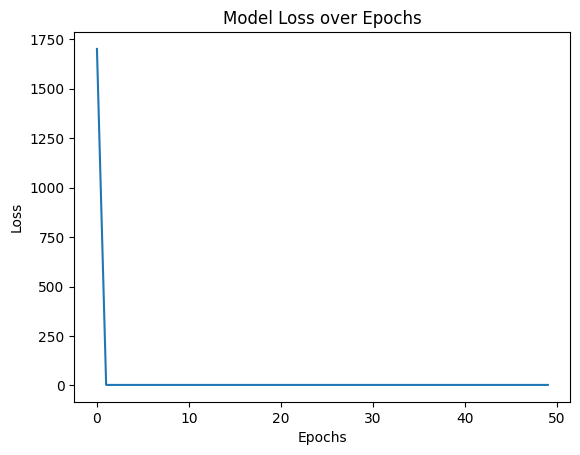

In [23]:
# Plotting the training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()